In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots 
import plotly.graph_objs as go 

In [3]:
train_set = pd.read_csv("train.csv")
test_set = pd.read_csv("test.csv")
submit=pd.read_csv("upload.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'upload.csv'

In [77]:
data = train_set.append(test_set) #先把訓練集和測試集合併，較好處理資料
data.reset_index(inplace=True, drop=True)
data = data.drop("CustomerId",axis = 1)
data = data.drop("Surname",axis = 1)
data

C:\Users\90607\AppData\Local\Temp\ipykernel_13736\2527063194.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = train_set.append(test_set) #先把訓練集和測試集合併，較好處理資料


,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,551,720,Spain,Male,38,5,114051.97,2,0,1,107577.29,0.0
1,6897,682,France,Female,54,4,62397.41,1,1,0,113088.60,1.0
2,4588,672,France,Female,31,5,119903.67,1,1,1,132925.17,0.0
3,291,592,Spain,Female,40,4,104257.86,1,1,0,110857.33,0.0
4,1673,753,Spain,Male,42,5,120387.73,1,0,1,126378.57,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7872,628,France,Male,35,6,62397.41,2,1,1,96201.09,NaN
9996,4257,639,Germany,Male,41,5,98154.30,2,1,0,109531.64,NaN
9997,2273,548,France,Female,46,3,119078.34,2,1,1,116725.67,NaN
9998,315,602,Spain,Female,44,7,62397.41,2,1,1,128135.95,NaN


In [78]:
data['Geography']=data['Geography'].map({'France':1,'Spain':2,'Germany':3}).astype('float') #將國家、性別轉換成數字
data['Gender']=data['Gender'].map({'Male':0,'Female':1}).astype('float')
data

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,551,720,2.0,0.0,38,5,114051.97,2,0,1,107577.29,0.0
1,6897,682,1.0,1.0,54,4,62397.41,1,1,0,113088.60,1.0
2,4588,672,1.0,1.0,31,5,119903.67,1,1,1,132925.17,0.0
3,291,592,2.0,1.0,40,4,104257.86,1,1,0,110857.33,0.0
4,1673,753,2.0,0.0,42,5,120387.73,1,0,1,126378.57,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7872,628,1.0,0.0,35,6,62397.41,2,1,1,96201.09,NaN
9996,4257,639,3.0,0.0,41,5,98154.30,2,1,0,109531.64,NaN
9997,2273,548,1.0,1.0,46,3,119078.34,2,1,1,116725.67,NaN
9998,315,602,2.0,1.0,44,7,62397.41,2,1,1,128135.95,NaN


In [79]:
train_set = data.iloc[:8000,:] #將訓練集和測試集分開來
test_set = data.iloc[8000:,:]

In [80]:
train_set

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,551,720,2.0,0.0,38,5,114051.97,2,0,1,107577.29,0.0
1,6897,682,1.0,1.0,54,4,62397.41,1,1,0,113088.60,1.0
2,4588,672,1.0,1.0,31,5,119903.67,1,1,1,132925.17,0.0
3,291,592,2.0,1.0,40,4,104257.86,1,1,0,110857.33,0.0
4,1673,753,2.0,0.0,42,5,120387.73,1,0,1,126378.57,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,5345,568,1.0,1.0,35,6,121079.60,2,1,1,124890.50,1.0
7996,5837,602,3.0,1.0,45,7,145846.07,1,1,0,99276.02,0.0
7997,7335,679,2.0,1.0,43,5,132810.01,1,1,0,130780.85,1.0
7998,9552,715,1.0,0.0,38,4,118729.45,1,0,0,95484.52,0.0


In [81]:
test_set

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8000,2209,726,1.0,1.0,39,3,62397.41,1,0,0,106139.31,NaN
8001,9924,661,1.0,0.0,42,3,130339.64,1,1,0,125776.38,NaN
8002,4617,545,1.0,0.0,34,6,62397.41,2,1,1,78372.28,NaN
8003,6077,731,2.0,1.0,42,3,86717.08,1,1,0,136026.27,NaN
8004,9240,533,1.0,1.0,50,6,62397.41,1,1,1,135205.58,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7872,628,1.0,0.0,35,6,62397.41,2,1,1,96201.09,NaN
9996,4257,639,3.0,0.0,41,5,98154.30,2,1,0,109531.64,NaN
9997,2273,548,1.0,1.0,46,3,119078.34,2,1,1,116725.67,NaN
9998,315,602,2.0,1.0,44,7,62397.41,2,1,1,128135.95,NaN


In [82]:
train_set.corr()['Exited'].abs().sort_values(ascending=False) #每個項目對exit的相關係數

Exited             1.000000
Age                0.284937
IsActiveMember     0.158626
Geography          0.152803
Balance            0.120387
Gender             0.104481
NumOfProducts      0.048936
CreditScore        0.024877
Tenure             0.015832
EstimatedSalary    0.007740
HasCrCard          0.006711
RowNumber          0.004003
Name: Exited, dtype: float64

In [83]:
train_set[['Geography', 'Exited']].groupby(['Geography'], as_index=False).mean().sort_values(by='Exited', ascending=False)

,Geography,Exited
2,3.0,0.321606
1,2.0,0.171053
0,1.0,0.161008


In [27]:
train_set[['Gender', 'Exited']].groupby(['Gender'], as_index=False).mean().sort_values(by='Exited', ascending=False)

,Gender,Exited
1,1.0,0.250207
0,0.0,0.165637


In [28]:
train_set[['Tenure', 'Exited']].groupby(['Tenure'], as_index=False).mean().sort_values(by='Exited', ascending=False)

,Tenure,Exited
0,2,0.238938
2,4,0.211356
1,3,0.208738
5,7,0.207595
4,6,0.200971
3,5,0.192372


In [29]:
train_set[['NumOfProducts', 'Exited']].groupby(['NumOfProducts'], as_index=False).mean().sort_values(by='Exited', ascending=False)

,NumOfProducts,Exited
3,4,1.000000
2,3,0.832558
0,1,0.279525
1,2,0.074385


In [31]:
train_set[['HasCrCard', 'Exited']].groupby(['HasCrCard'], as_index=False).mean().sort_values(by='Exited', ascending=False)

,HasCrCard,Exited
0,0,0.208158
1,1,0.202241


In [30]:
train_set[['IsActiveMember', 'Exited']].groupby(['IsActiveMember'], as_index=False).mean().sort_values(by='Exited', ascending=False)

,IsActiveMember,Exited
0,0,0.270116
1,1,0.142201


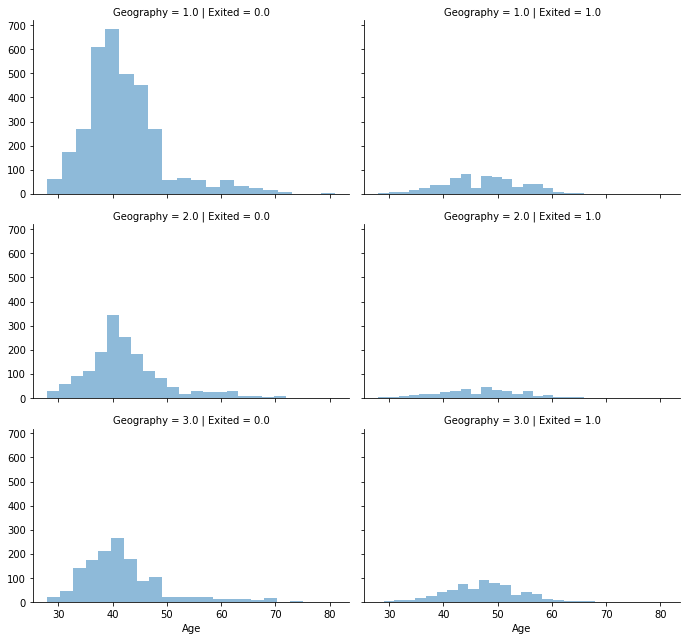

In [37]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_set, col='Exited', row='Geography', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

c:\Users\90607\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\90607\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


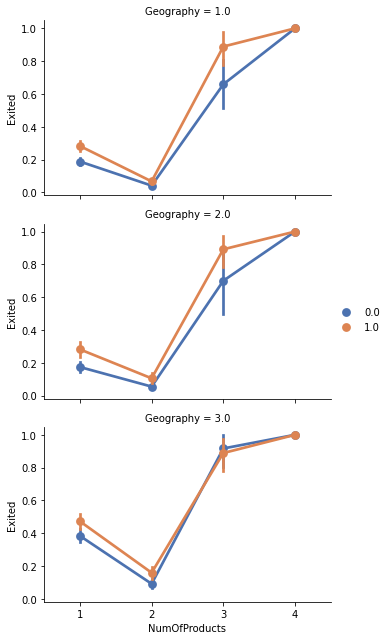

In [39]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_set, row='Geography', aspect=1.6)
grid.map(sns.pointplot, 'NumOfProducts', 'Exited', 'Gender', palette='deep')
grid.add_legend()

In [84]:
train_set['AgeBand'] = pd.cut(train_set['Age'], 5)
train_set[['AgeBand', 'Exited']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

C:\Users\90607\AppData\Local\Temp\ipykernel_13736\885582342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['AgeBand'] = pd.cut(train_set['Age'], 5)


,AgeBand,Exited
0,"(27.947, 38.6]",0.075710
1,"(38.6, 49.2]",0.197050
2,"(49.2, 59.8]",0.544653
3,"(59.8, 70.4]",0.238095
4,"(70.4, 81.0]",0.000000


In [91]:
for dataset in data:    
    data.loc[ data['Age'] <= 38.6, 'Age'] = 0
    data.loc[(data['Age'] > 38.6) & (data['Age'] <= 49.2), 'Age'] = 1
    data.loc[(data['Age'] > 49.2) & (data['Age'] <= 59.8), 'Age'] = 2
    data.loc[(data['Age'] > 59.8) & (data['Age'] <= 70.4), 'Age'] = 3
    data.loc[ data['Age'] > 70.4, 'Age'] == 4
train_set.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeBand
0,551,720,2.0,0.0,0,5,114051.97,2,0,1,107577.29,0.0,"(27.947, 38.6]"
1,6897,682,1.0,1.0,0,4,62397.41,1,1,0,113088.60,1.0,"(49.2, 59.8]"
2,4588,672,1.0,1.0,0,5,119903.67,1,1,1,132925.17,0.0,"(27.947, 38.6]"
3,291,592,2.0,1.0,0,4,104257.86,1,1,0,110857.33,0.0,"(38.6, 49.2]"
4,1673,753,2.0,0.0,0,5,120387.73,1,0,1,126378.57,0.0,"(38.6, 49.2]"


In [67]:
train_set = train_set.drop(['AgeBand'], axis=1)
combine = [train_set, test_set]
train_set.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,551,720,2.0,0.0,0,5,114051.97,2,0,1,107577.29,0.0
1,6897,682,1.0,1.0,0,4,62397.41,1,1,0,113088.60,1.0
2,4588,672,1.0,1.0,0,5,119903.67,1,1,1,132925.17,0.0
3,291,592,2.0,1.0,0,4,104257.86,1,1,0,110857.33,0.0
4,1673,753,2.0,0.0,0,5,120387.73,1,0,1,126378.57,0.0


In [47]:
X_train = train_set.drop("Exited", axis=1)
Y_train = train_set["Exited"]
X_test  = test_set.drop("Exited", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((8000, 11), (8000,), (2000, 11))

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [93]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

78.57

In [94]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

79.6

In [95]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.45

In [96]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.26

In [97]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.6

In [74]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

c:\Users\90607\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



20.4

In [75]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

79.6

In [76]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

In [77]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

100.0

In [78]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
8,Decision Tree,100.00
1,KNN,84.45
0,Support Vector Machines,79.60
5,Perceptron,79.60
6,Stochastic Gradient Decent,79.60
4,Naive Bayes,79.26
2,Logistic Regression,78.57
7,Linear SVC,20.40


In [80]:
submit

,RowNumber,Exited
0,2209,0
1,9924,0
2,4617,0
3,6077,0
4,9240,0
...,...,...
1995,7872,0
1996,4257,0
1997,2273,0
1998,315,0


In [81]:
submit = pd.DataFrame({
        "RowNumber": test_set["RowNumber"],
        "Exited": Y_pred
    })
submit

,RowNumber,Exited
8000,2209,0.0
8001,9924,0.0
8002,4617,0.0
8003,6077,0.0
8004,9240,0.0
...,...,...
9995,7872,0.0
9996,4257,0.0
9997,2273,0.0
9998,315,0.0
